In [46]:
import pandas as pd
import glob as glob
import tqdm

<mark style="background-color: yellow;"> **Update 2/9/25: I realized this approximation is incorrect because I'm using UMIs per barcode without taking into account how many reads each UMI has. Disregard this result.</mark>**

# Downsampling reads per UMI

## 5 minutes

In [108]:
t5_reads_per_UMI = pd.read_csv("//Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk/RPTR_1_5_S2_R1_001_1_chunk.fq_simple_umi_counts.tsv", sep="\t", encoding="latin1")
t5_reads_per_UMI = t5_reads_per_UMI[t5_reads_per_UMI["RPTR_BC"].str.len() == 14]
t5_reads_per_UMI

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_26900/3822961796.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  t5_reads_per_UMI = pd.read_csv("//Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk/RPTR_1_5_S2_R1_001_1_chunk.fq_simple_umi_counts.tsv", sep="\t", encoding="latin1")


,RPTR_BC,count
0,AAAAAAAAAAAAAA,11
1,AAAAAAAAAAAAAT,1
2,AAAAAAAAAAAACA,5
3,AAAAAAAAAAAAGA,3
4,AAAAAAAAAAAAGG,1
...,...,...
1536798,TTTTGTGTGAGCGA,1
1536799,TTTTGTGTGGCGGT,1
1536800,TTTTGTGTGGGATG,1
1536801,TTTTGTGTGGGTGA,1


In [107]:
# Calculate the total number of reads for t5
t5_total_reads = t5_reads_per_UMI['count'].astype(int).sum()

# Define the percentage of total reads to sample for t5 (e.g., t5_X%)
t5_X = 10  # Replace with your desired percentage
t5_sample_size = int((t5_X / 100) * t5_total_reads)

# Sample with replacement, using 'count' as weights for t5
t5_sampled_reads = t5_reads_per_UMI.sample(
    n=t5_sample_size,
    replace=True,
    weights=t5_reads_per_UMI['count'].astype(int)  # Optional: for reproducibility
)

# Update the counts to reflect the number of times each RPTR_BC was sampled for t5
t5_sampled_reads = pd.DataFrame(t5_sampled_reads['RPTR_BC'].value_counts()).reset_index()
t5_sampled_reads


,RPTR_BC,count
0,CATTCATAAAGAAC,3558
1,TACAACCGGCAAGG,2710
2,CCAACGGTGTCGAA,2568
3,TGTATCCATCTACC,2339
4,TGCATCTAGATAAA,2280
...,...,...
260442,CCGCAGCAGCTTAG,1
260443,CACTCCCGTGTTGC,1
260444,CTGCGAGAGTGCGC,1
260445,GCANATGAATAGGA,1


In [78]:
# Define the percentages for sampling
t5_percentages = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 25, 33, 50, 100]

# Dictionary to store sampled reads for each percentage and replicate
t5_sampled_reads_reps_dict = {}

# Loop through each percentage and perform 3 replicates
for t5_percentage in tqdm.tqdm(t5_percentages):
    t5_sampled_reads_reps_dict[f"{t5_percentage}%"] = []
    for t5_rep in range(3):  # 3 replicates
        t5_sample_size = int((t5_percentage / 100) * t5_total_reads)
        t5_sampled_reads = t5_reads_per_UMI.sample(
            n=t5_sample_size,
            replace=True,
            weights=t5_reads_per_UMI['count'].astype(int)
        )
        # Update the counts to reflect the number of times each RPTR_BC was sampled
        t5_sampled_reads = pd.DataFrame(t5_sampled_reads['RPTR_BC'].value_counts()).reset_index()
        t5_sampled_reads.columns = ['RPTR_BC', 'count']
        t5_sampled_reads_reps_dict[f"{t5_percentage}%"].append(t5_sampled_reads)

# Now `t5_sampled_reads_reps_dict` contains the sampled reads for each percentage and replicate

100%|██████████| 13/13 [00:30<00:00,  2.35s/it]


## 30 minutes

In [58]:
# Load the t30 dataset
t30_reads_per_UMI = pd.read_csv("//Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_1_chunk/RPTR_1_30_S5_R1_001_1_chunk.fq_simple_umi_counts.tsv", sep="\t", encoding="latin1")

# Filter rows where RPTR_BC length is 14
t30_reads_per_UMI = t30_reads_per_UMI[t30_reads_per_UMI["RPTR_BC"].str.len() == 14]

# Display the dataframe
t30_reads_per_UMI

,RPTR_BC,count
0,AAAAAAAAAAAAAA,15
1,AAAAAAAAAAAAAG,3
2,AAAAAAAAAAAAAT,1
3,AAAAAAAAAAAACA,10
4,AAAAAAAAAAAAGA,4
...,...,...
2667189,TTTTTTTTTCAGTT,1
2667190,TTTTTTTTTCGGGG,1
2667191,TTTTTTTTTTAGGA,1
2667192,TTTTTTTTTTATGA,1


In [59]:
# Calculate the total number of reads for t30
t30_total_reads = t30_reads_per_UMI['count'].astype(int).sum()

# Define the percentage of total reads to sample for t30 (e.g., t30_X%)
t30_X = 10  # Replace with your desired percentage
t30_sample_size = int((t30_X / 100) * t30_total_reads)

# Sample with replacement, using 'count' as weights for t30
t30_sampled_reads = t30_reads_per_UMI.sample(
    n=t30_sample_size,
    replace=True,
    weights=t30_reads_per_UMI['count'].astype(int)  # Optional: for reproducibility
)

# Update the counts to reflect the number of times each RPTR_BC was sampled for t30
t30_sampled_reads = pd.DataFrame(t30_sampled_reads['RPTR_BC'].value_counts()).reset_index()
t30_sampled_reads


,RPTR_BC,count
0,CATTCATAAAGAAC,20898
1,CCAACGGTGTCGAA,13701
2,TGTATCCATCTACC,13152
3,TACAACCGGCAAGG,12717
4,TGCATCTAGATAAA,12285
...,...,...
451221,CGAGTGCTGTGGGT,1
451222,TCGAAATTGACGGT,1
451223,TGAAGCCGCGGGGG,1
451224,TGAGCCGATGAGTG,1


In [77]:
# Define the percentages for sampling
t30_percentages = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 25, 33, 50, 100]

# Dictionary to store sampled reads for each percentage and replicate
t30_sampled_reads_reps_dict = {}

# Loop through each percentage and perform 3 replicates
for t30_percentage in tqdm.tqdm(t30_percentages):
    t30_sampled_reads_reps_dict[f"{t30_percentage}%"] = []
    for t30_rep in range(3):  # 3 replicates
        t30_sample_size = int((t30_percentage / 100) * t30_total_reads)
        t30_sampled_reads = t30_reads_per_UMI.sample(
            n=t30_sample_size,
            replace=True,
            weights=t30_reads_per_UMI['count'].astype(int)
        )
        # Update the counts to reflect the number of times each RPTR_BC was sampled
        t30_sampled_reads = pd.DataFrame(t30_sampled_reads['RPTR_BC'].value_counts()).reset_index()
        t30_sampled_reads.columns = ['RPTR_BC', 'count']
        t30_sampled_reads_reps_dict[f"{t30_percentage}%"].append(t30_sampled_reads)

# Now `t30_sampled_reads_reps_dict` contains the sampled reads for each percentage and replicate

100%|██████████| 13/13 [02:11<00:00, 10.10s/it]


# Full results to compare

In [79]:
step1_map = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/step1_AD_AD_BC_RPTR_BC_designed.csv")
step1_map = step1_map[["AD", "AD_BC", "RPTR_BC"]]
step1_map

,AD,AD_BC,RPTR_BC
0,CCATTGTGTTCTCCTAAAGCTCCATCTGCTTTGATTACTCCAATGA...,AAAGTTATCAA,TTCGGTGCCATAAC
1,TTTGATCCATCTAATGAAATTTCATTTGATGATCCAGTCTTGTTTC...,CAGTAACTATC,ATACGACGCTTTAC
2,TCTTCTTCTGTTCCATCTTCTGTTTCTAATATGGGTACTGTTTCTC...,GACCCCAACGT,CACCACGCTTAGCT
3,CCAACTTCTACTGCTACTACTAATTTGGCTTCTCCATTGTCTTTGT...,GGATCCAAGTT,ATGCGTATTATTTA
4,GCTGCTCATTACTTCTTGGCTTTGAGACAATCTCAAGAGTTCTCTG...,TCACTTGTTAT,CGAATGACTCGACC
...,...,...,...
127403,ACTGCTTTGACTTCTCCATCTTTGTATGATGAATCTCCAGACTTTG...,CCTTCCCGCAG,TCGCAATTTCCTCT
127404,GTTGCTAATATGGCTGATTTAAATTCTAATAATTCATTTGATTCTG...,TTCACTCCTTA,CACGCAAGCCAAGG
127405,GCATTTACTAATTTGACTTCTCCATCTACTTATAATGAATCTCCAG...,CTCGGCAGAAG,TAACCCCAACACCG
127406,AATGCTTCTTCTGCTCCATCTTCTTCTTCATTTGGTTTGTCTGGTA...,TAAGAAACGAC,GAGGACAATCATCG


In [80]:
# Getting RT results alone
RPTR_BC_umi_counts_t5 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk/RPTR_1_5_S2_R1_001_1_chunk.fq_simple_umi_counts.tsv", sep="\t", encoding='latin-1')
RPTR_BC_umi_counts_t5 = RPTR_BC_umi_counts_t5.rename(columns={"count": "RT_umi_count"})

# Getting AD results alone
AD_BC_counts_t5 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_AD_1_5/AD_1_5_simple_umi_counts.tsv", sep="\t")
AD_BC_counts_t5 = AD_BC_counts_t5.rename(columns={"count": "AD_umi_count"})

# Adding RT results to step 1 map
step1_map_with_RPTR_BC_t5 = pd.merge(step1_map, RPTR_BC_umi_counts_t5, how="left")

# Adding AD results to step 1 map
step1_map_with_RPTR_BC_AD_BC_t5 = pd.merge(step1_map_with_RPTR_BC_t5, AD_BC_counts_t5, how="left")

# Removing nulls from step 1 map
step1_map_with_RPTR_BC_AD_BC_no_nulls_t5 = step1_map_with_RPTR_BC_AD_BC_t5.dropna()

# Adding '_full' suffix to the last two columns
step1_map_with_RPTR_BC_AD_BC_no_nulls_t5 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.rename(
    columns={
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-2]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-2] + '_full',
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-1]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-1] + '_full'
    }
)

# Creating a copy and calculating activity
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.copy(deep=True)
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5["activity_full"] = (
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5["RT_umi_count_full"].astype(int) /
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5["AD_umi_count_full"].astype(int)
)

step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_26900/3458348559.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  RPTR_BC_umi_counts_t5 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk/RPTR_1_5_S2_R1_001_1_chunk.fq_simple_umi_counts.tsv", sep="\t", encoding='latin-1')


,AD,AD_BC,RPTR_BC,RT_umi_count_full,AD_umi_count_full,activity_full
7,GATGATATTGTTGATGTTGTTGGTGATTCTCCATCTACTTCTCCAA...,CTCTGTTGCAG,TGGATACTAACCTG,173,1891.0,0.091486
19,ATGGGTACTGTTTCTCCACAAGATTTGTTGATTCAAGAACCATTTA...,AAGATATGTCT,TGCCTATGGTACAA,765,542.0,1.411439
37,TCTGTTGAAGCTTCTCCAGCTACTCCATCTGAAGATTTGGAAGCTT...,TAATTCTTAAA,AAAGCAACCGAAGA,55,154.0,0.357143
42,AAATTGGAAGCTCCAGCTACTACTCATTTGACTTTGGATGCTATCT...,GGGTAGAAGTA,TAGTAGATGGAATT,37,22.0,1.681818
46,ATTGATATGTTCTTGGAAGATTCTGATTCTCCATCTGCTTCTTGTT...,CGATTCGAGAA,AACACAAACCATAG,32,101.0,0.316832
...,...,...,...,...,...,...
127373,GGTTCTGAAGAATGGGGTCCATTGTTTCCAGCTCAAGATGACTTCT...,TACAATTAACT,TTCGATTAGTTTCA,940,918.0,1.023965
127378,ACTGCTGCTCCAAGATCTTCTGCTACTAAACATTCTACTGTTGCTG...,ACTAGTTTGCA,ACCCACGGCATTGT,54,501.0,0.107784
127379,CAATCTTCTGGTTTGAGATCTTCTTTGCAGAATCAAAGAGTTGCTG...,ACCCAGGACTT,TGGCTTTATGCAAT,46,485.0,0.094845
127388,GAATCTACTGTTTCTGTTGCTGCTACTGCTACTGTTACTGCTAAGA...,TAAGCCCTCGC,TACACTGATACTGA,188,1.0,188.000000


In [81]:
# Getting RT results alone
RPTR_BC_umi_counts_t30 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_1_chunk/RPTR_1_30_S5_R1_001_1_chunk.fq_simple_umi_counts.tsv", sep="\t")
RPTR_BC_umi_counts_t30 = RPTR_BC_umi_counts_t30.rename(columns={"count": "RT_umi_count"})

# Getting AD results alone
AD_BC_counts_t30 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_AD_1_30/AD_1_30_simple_umi_counts.tsv", sep="\t")
AD_BC_counts_t30 = AD_BC_counts_t30.rename(columns={"count": "AD_umi_count"})

# Adding RT results to step 1 map
step1_map_with_RPTR_BC_t30 = pd.merge(step1_map, RPTR_BC_umi_counts_t30, how="left")

# Adding AD results to step 1 map
step1_map_with_RPTR_BC_AD_BC_t30 = pd.merge(step1_map_with_RPTR_BC_t30, AD_BC_counts_t30, how="left")

# Removing nulls from step 1 map
step1_map_with_RPTR_BC_AD_BC_no_nulls_t30 = step1_map_with_RPTR_BC_AD_BC_t30.dropna()

# Adding '_full' suffix to the last two columns
step1_map_with_RPTR_BC_AD_BC_no_nulls_t30 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.rename(
    columns={
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-2]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-2] + '_full',
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-1]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-1] + '_full'
    }
)

# Creating a copy and calculating activity
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.copy(deep=True)
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30["activity_full"] = (
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30["RT_umi_count_full"].astype(int) /
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30["AD_umi_count_full"].astype(int)
)

step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30

,AD,AD_BC,RPTR_BC,RT_umi_count_full,AD_umi_count_full,activity_full
7,GATGATATTGTTGATGTTGTTGGTGATTCTCCATCTACTTCTCCAA...,CTCTGTTGCAG,TGGATACTAACCTG,315.0,1988.0,0.158451
19,ATGGGTACTGTTTCTCCACAAGATTTGTTGATTCAAGAACCATTTA...,AAGATATGTCT,TGCCTATGGTACAA,3864.0,594.0,6.505051
37,TCTGTTGAAGCTTCTCCAGCTACTCCATCTGAAGATTTGGAAGCTT...,TAATTCTTAAA,AAAGCAACCGAAGA,19.0,156.0,0.121795
42,AAATTGGAAGCTCCAGCTACTACTCATTTGACTTTGGATGCTATCT...,GGGTAGAAGTA,TAGTAGATGGAATT,32.0,31.0,1.032258
46,ATTGATATGTTCTTGGAAGATTCTGATTCTCCATCTGCTTCTTGTT...,CGATTCGAGAA,AACACAAACCATAG,39.0,160.0,0.243750
...,...,...,...,...,...,...
127373,GGTTCTGAAGAATGGGGTCCATTGTTTCCAGCTCAAGATGACTTCT...,TACAATTAACT,TTCGATTAGTTTCA,5057.0,886.0,5.707675
127378,ACTGCTGCTCCAAGATCTTCTGCTACTAAACATTCTACTGTTGCTG...,ACTAGTTTGCA,ACCCACGGCATTGT,83.0,528.0,0.157197
127379,CAATCTTCTGGTTTGAGATCTTCTTTGCAGAATCAAAGAGTTGCTG...,ACCCAGGACTT,TGGCTTTATGCAAT,86.0,462.0,0.186147
127388,GAATCTACTGTTTCTGTTGCTGCTACTGCTACTGTTACTGCTAAGA...,TAAGCCCTCGC,TACACTGATACTGA,227.0,1.0,227.000000


# Activity scores

In [84]:
from scipy.stats import pearsonr, spearmanr

def calculate_correlations(sampled_reads_reps_dict, step1_map, AD_BC_counts, step1_map_with_RPTR_BC_AD_BC_no_nulls_full, label):
    """
    Calculate Pearson and Spearman correlations for downsampled reads.

    Parameters:
    - sampled_reads_reps_dict: Dictionary containing sampled reads for each percentage and replicate.
    - step1_map: DataFrame containing the step1 mapping data.
    - AD_BC_counts: DataFrame containing AD counts.
    - step1_map_with_RPTR_BC_AD_BC_no_nulls_full: DataFrame containing the full dataset with activity scores.
    - label: A string label ('t5' or 't30') for distinguishing datasets.

    Returns:
    - summary_df: DataFrame containing the summary of correlations.
    """
    summary_data = []

    for percentage, replicates in tqdm.tqdm(sampled_reads_reps_dict.items()):
        for rep_idx, sampled_reads in enumerate(replicates):
            # Merge RT results with step1_map
            step1_map_with_RPTR_BC = pd.merge(step1_map, sampled_reads, how="left")
            step1_map_with_RPTR_BC = step1_map_with_RPTR_BC.rename(columns={"count": "RT_umi_count_downsampled"})

            # Merge AD results with step1_map_with_RPTR_BC
            step1_map_with_RPTR_BC_AD_BC = pd.merge(step1_map_with_RPTR_BC, AD_BC_counts, how="left")
            step1_map_with_RPTR_BC_AD_BC = step1_map_with_RPTR_BC_AD_BC.rename(columns={"AD_umi_count": "AD_umi_count_downsampled"})

            # Remove nulls
            step1_map_with_RPTR_BC_AD_BC_no_nulls = step1_map_with_RPTR_BC_AD_BC.dropna()

            # Merge with the full dataset
            merged_df = pd.merge(
                step1_map_with_RPTR_BC_AD_BC_no_nulls_full,
                step1_map_with_RPTR_BC_AD_BC_no_nulls,
                on=["AD", "AD_BC", "RPTR_BC"],
                how="inner",
            )

            merged_df["activity_downsampled"] = merged_df["RT_umi_count_downsampled"].astype(float) / merged_df["AD_umi_count_downsampled"].astype(float)

            # Calculate Pearson and Spearman correlations
            pearson_corr, _ = pearsonr(
                merged_df["activity_full"], merged_df["activity_downsampled"]
            )
            spearman_corr, _ = spearmanr(
                merged_df["activity_full"], merged_df["activity_downsampled"]
            )

            # Append the results to the summary data
            summary_data.append({
                "dataset": label,
                "percentage": percentage,
                "replicate": rep_idx + 1,
                "pearson_corr": pearson_corr,
                "spearman_corr": spearman_corr
            })

    # Convert the summary data into a dataframe
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Run the function for t5
summary_df_t5 = calculate_correlations(
    t5_sampled_reads_reps_dict,
    step1_map,
    AD_BC_counts_t5,
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5,
    label="t5"
)

# Run the function for t30
summary_df_t30 = calculate_correlations(
    t30_sampled_reads_reps_dict,
    step1_map,
    AD_BC_counts_t30,
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30,
    label="t30"
)



100%|██████████| 13/13 [00:06<00:00,  1.86it/s]


In [98]:
summary_df_t5

,dataset,percentage,replicate,pearson_corr,spearman_corr,percentage_numeric
0,t5,0.005%,1,0.709283,0.653988,0.005
1,t5,0.005%,2,0.663162,0.733727,0.005
2,t5,0.005%,3,0.614531,0.694058,0.005
3,t5,0.01%,1,0.608677,0.741726,0.010
4,t5,0.01%,2,0.729881,0.727719,0.010
5,t5,0.01%,3,0.838347,0.665993,0.010
6,t5,0.05%,1,0.897740,0.790232,0.050
7,t5,0.05%,2,0.885789,0.791694,0.050
8,t5,0.05%,3,0.845892,0.805508,0.050
9,t5,0.1%,1,0.937674,0.819631,0.100


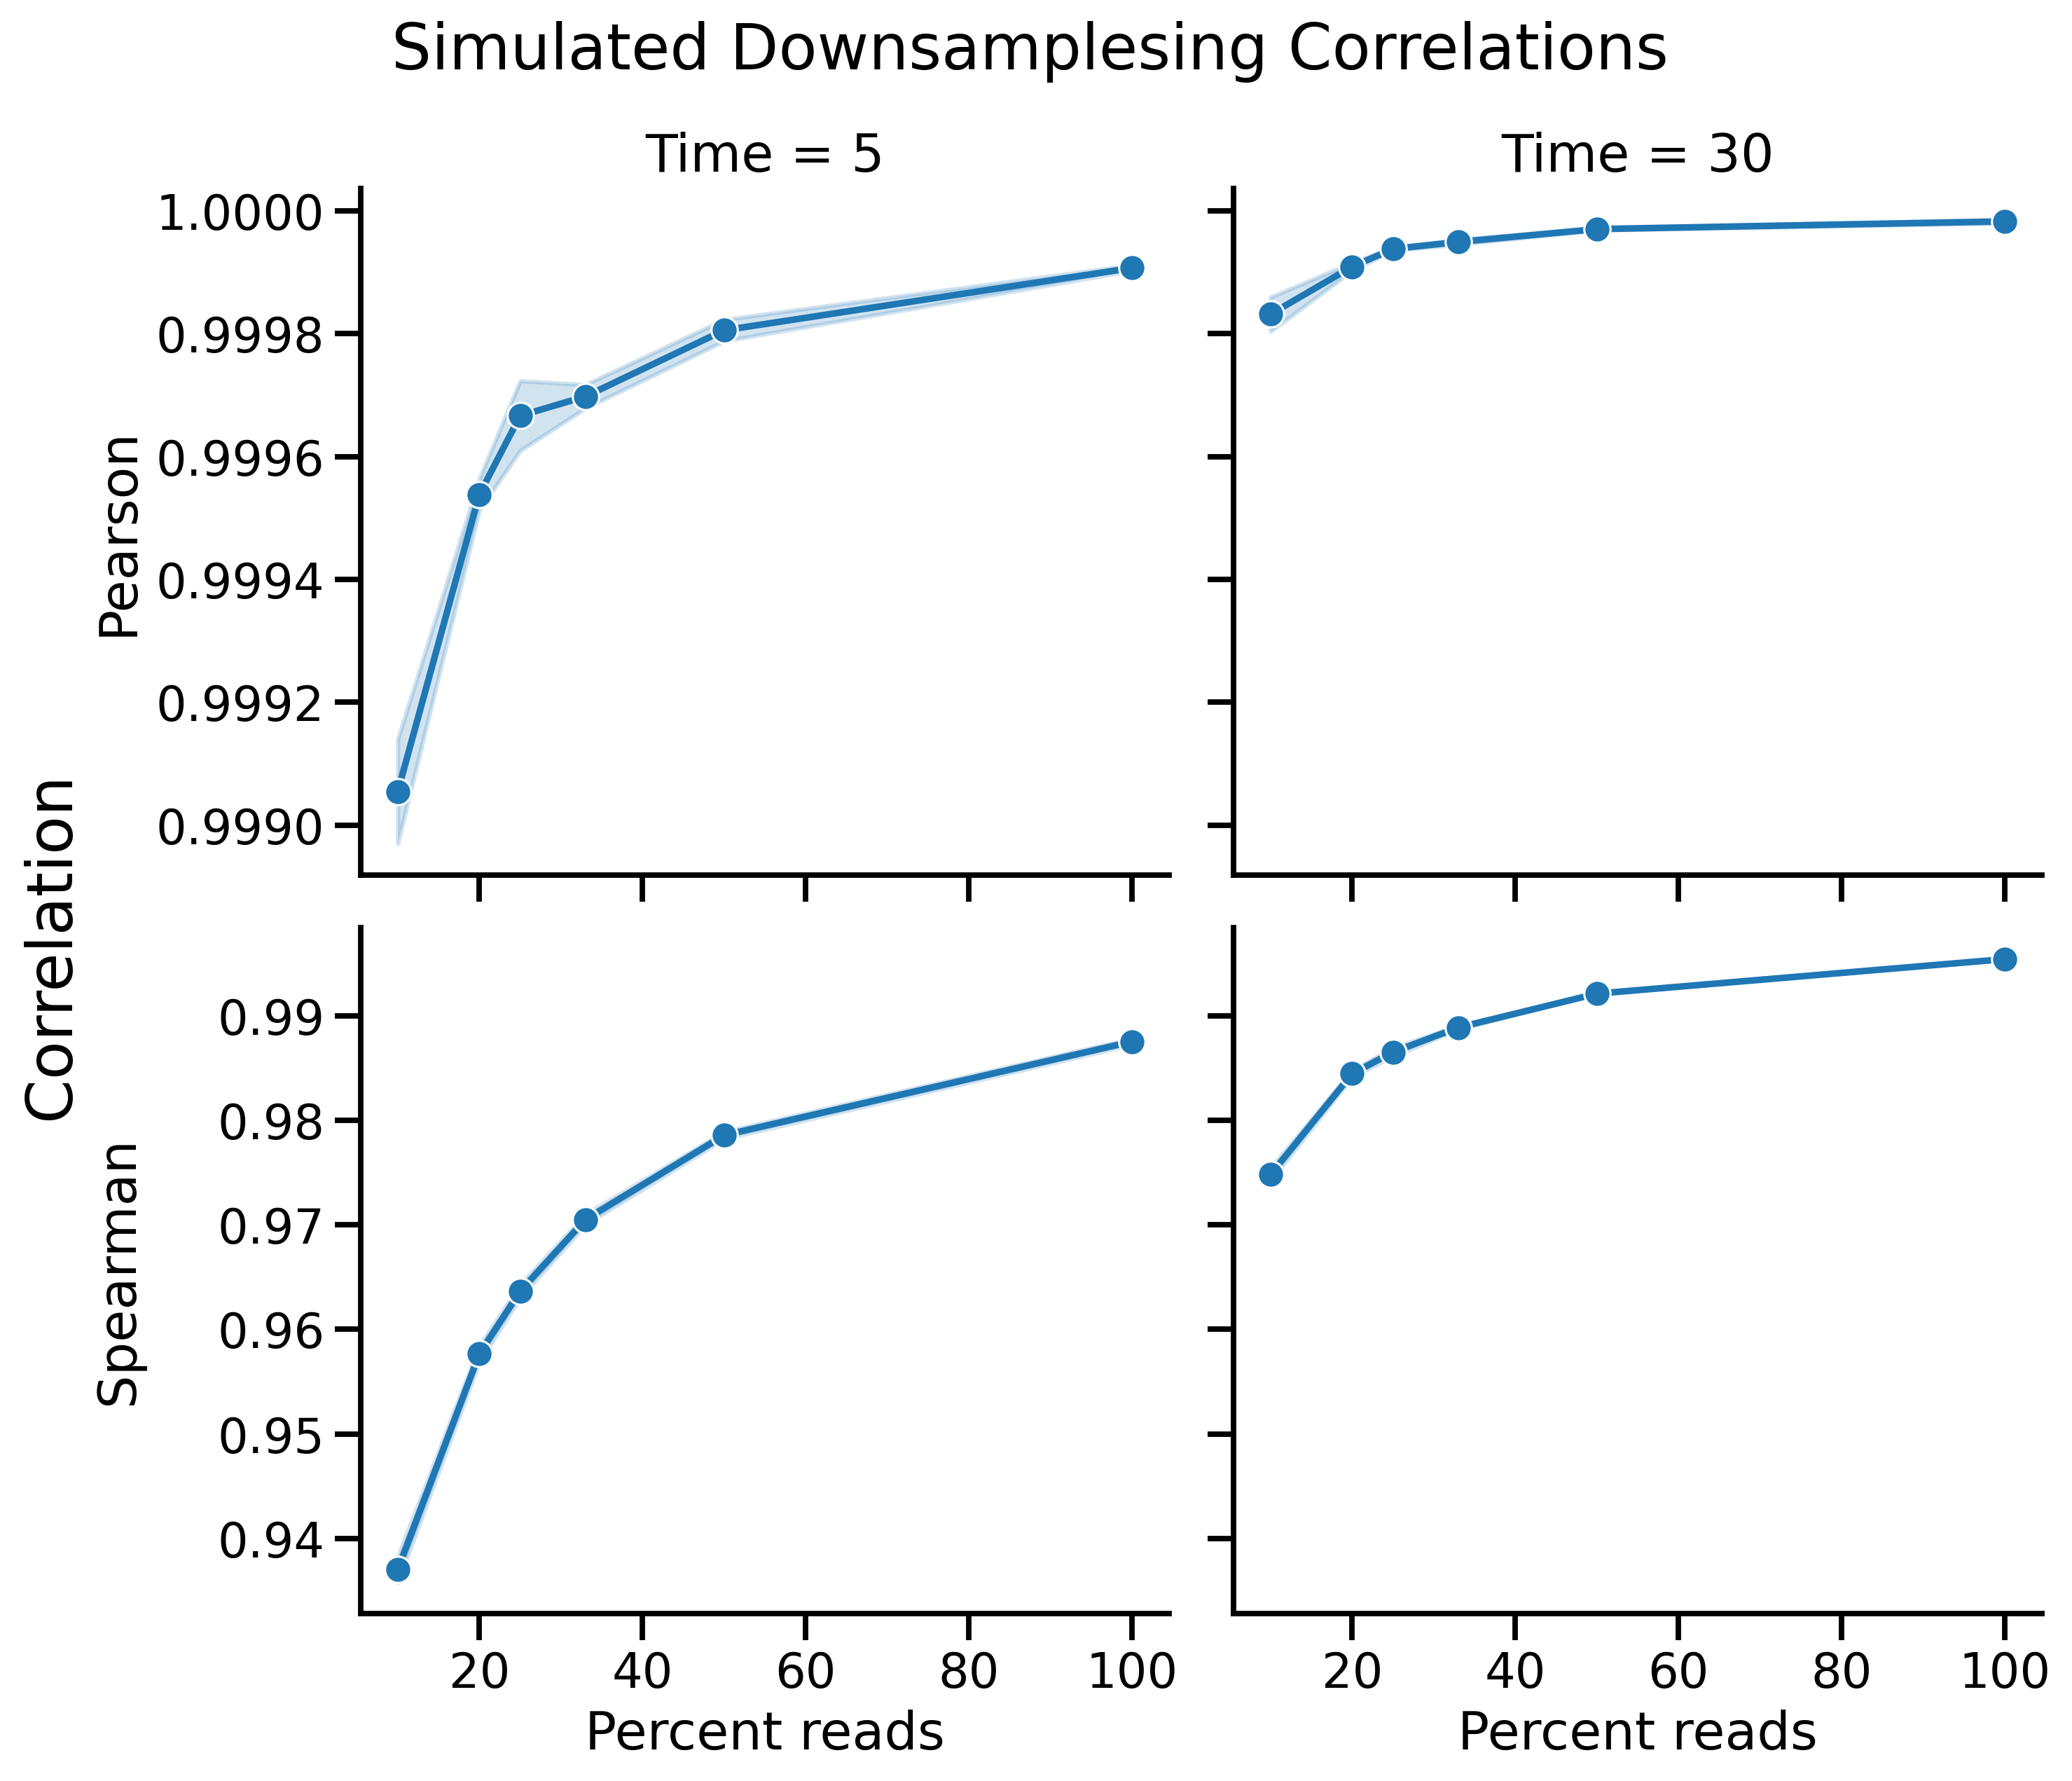

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context for better visualization
sns.set_context("talk")

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=300, sharex=True, sharey='row')

# ---------- Pearson (row 0) ----------
sns.lineplot(
    data=summary_df_t5[summary_df_t5["percentage_numeric"] > 5],
    x="percentage_numeric",
    y="pearson_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Time = 5")
axes[0, 0].set_ylabel("Pearson")
axes[0, 0].set_xlabel("")
sns.despine(ax=axes[0, 0])

sns.lineplot(
    data=summary_df_t30[summary_df_t30["percentage_numeric"] > 5],
    x="percentage_numeric",
    y="pearson_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Time = 30")
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("")
sns.despine(ax=axes[0, 1])

# ---------- Spearman (row 1) ----------
sns.lineplot(
    data=summary_df_t5[summary_df_t5["percentage_numeric"] > 5],
    x="percentage_numeric",
    y="spearman_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1, 0]
)
axes[1, 0].set_ylabel("Spearman")
axes[1, 0].set_xlabel("Percent reads")
sns.despine(ax=axes[1, 0])

sns.lineplot(
    data=summary_df_t30[summary_df_t30["percentage_numeric"] > 5],
    x="percentage_numeric",
    y="spearman_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1, 1]
)
axes[1, 1].set_ylabel("")
axes[1, 1].set_xlabel("Percent reads")
sns.despine(ax=axes[1, 1])

# Align y-labels and add a super y-label
fig.align_ylabels(axes)
fig.supylabel("Correlation")

# Adjust layout
plt.tight_layout(pad=0.5)
plt.suptitle("Simulated Downsamplesing Correlations", y=1.05)
plt.show()

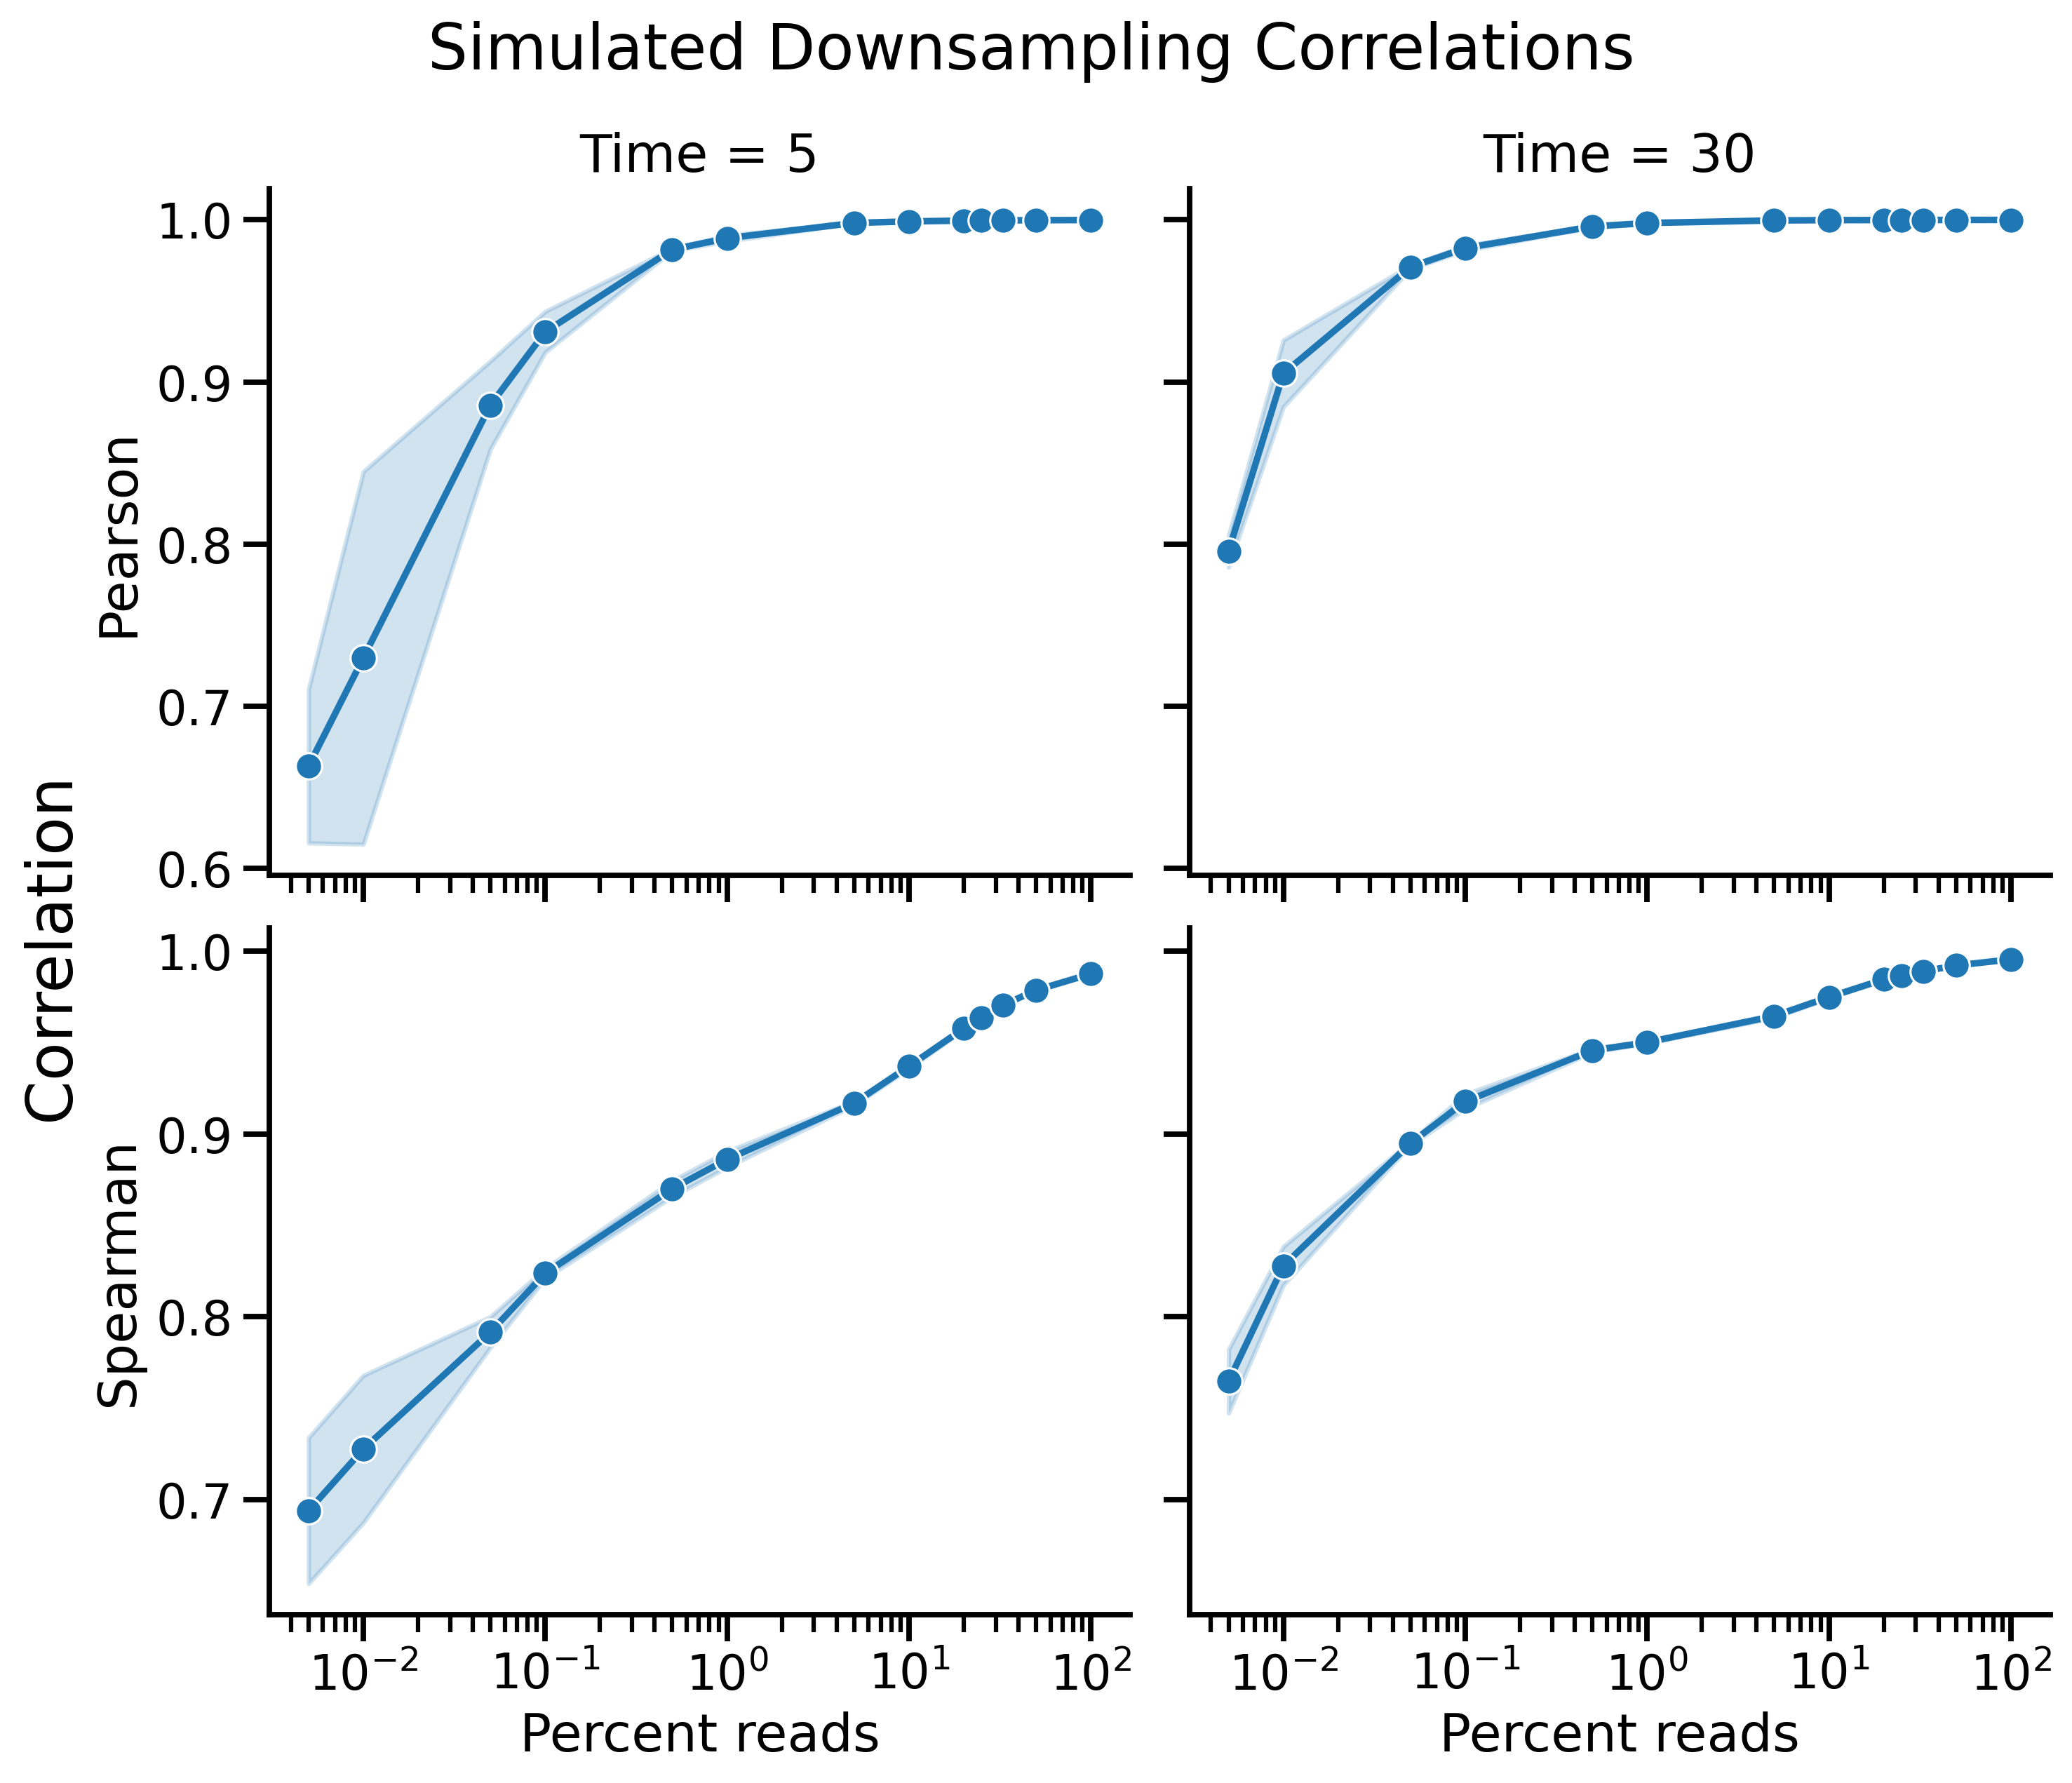

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context for better visualization
sns.set_context("talk")

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=300, sharex=True, sharey='row')

# ---------- Pearson (row 0) ----------
sns.lineplot(
    data=summary_df_t5,
    x="percentage_numeric",
    y="pearson_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Time = 5")
axes[0, 0].set_ylabel("Pearson")
axes[0, 0].set_xlabel("")
axes[0, 0].set_xscale('log')  # Set x-axis to log scale
sns.despine(ax=axes[0, 0])

sns.lineplot(
    data=summary_df_t30,
    x="percentage_numeric",
    y="pearson_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Time = 30")
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("")
axes[0, 1].set_xscale('log')  # Set x-axis to log scale
sns.despine(ax=axes[0, 1])

# ---------- Spearman (row 1) ----------
sns.lineplot(
    data=summary_df_t5,
    x="percentage_numeric",
    y="spearman_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1, 0]
)
axes[1, 0].set_ylabel("Spearman")
axes[1, 0].set_xlabel("Percent reads")
axes[1, 0].set_xscale('log')  # Set x-axis to log scale
sns.despine(ax=axes[1, 0])

sns.lineplot(
    data=summary_df_t30,
    x="percentage_numeric",
    y="spearman_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1, 1]
)
axes[1, 1].set_ylabel("")
axes[1, 1].set_xlabel("Percent reads")
axes[1, 1].set_xscale('log')  # Set x-axis to log scale
sns.despine(ax=axes[1, 1])

# Align y-labels and add a super y-label
fig.align_ylabels(axes)
fig.supylabel("Correlation")

# Adjust layout
plt.tight_layout(pad=0.5)
plt.suptitle("Simulated Downsampling Correlations", y=1.05)
plt.show()